# **Aerofit**

Aerofit is one of the leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

So here I have tried to predict the customer behaviour regarding 3 types of treadmills that are KP281, KP481 and KP781. What is the gender, marital status, age, education, miles, fitness, income and usage distribution for each product.
Also created Contingeny tables to predict the conditional and marginal probabilities so that, it would provide better insights to predict the purcahse pattern of the different customers.

**About**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased: KP281, KP481, or KP781

Age: In years

Gender: Male/Female

Education: In years

MaritalStatus: Single or partnered

Usage: The average number of times the customer plans to use the treadmill each week.

Income: Annual income (in $)

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles: The average number of miles the customer expects to walk/run each week


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')

In [ ]:
#checking the dataframe
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

180 rows and 9 columns

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no null values/missing values in the given dataset.

**Detect Outliers**
* **Find the outliers for every continuous variable in the dataset.**





In [ ]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

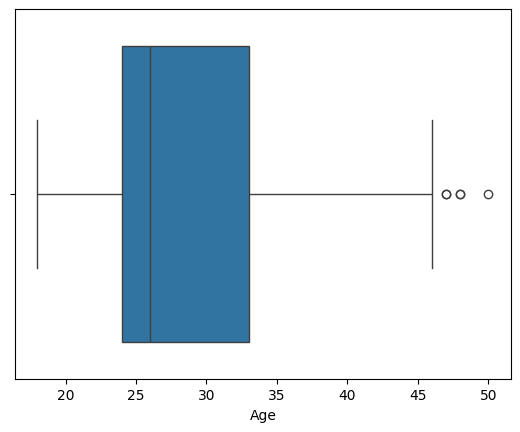

In [ ]:
sns.boxplot(df['Age'], orient='h')
plt.show()

In [ ]:
age_25=np.percentile(df['Age'],25)
age_25

24.0

In [ ]:
age_50=np.percentile(df['Age'],50)
age_50

26.0

In [ ]:
age_75=np.percentile(df['Age'],75)
age_75

33.0

In [ ]:
iqr_age=age_75-age_25
iqr_age

9.0

In [ ]:
#now to calulate the buffer
upper_age_limit=age_75+1.5*iqr_age
upper_age_limit

46.5

It means that any value above 46.5 will be considered as an outlier in case of age.

In [ ]:
age_outliers=df[df['Age']>upper_age_limit]
age_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
lower_age_limit= age_25-1.5*iqr_age
lower_age_limit

10.5

In [ ]:
df[df['Age']<lower_age_limit]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


No outliers in lower age limit.

In [ ]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

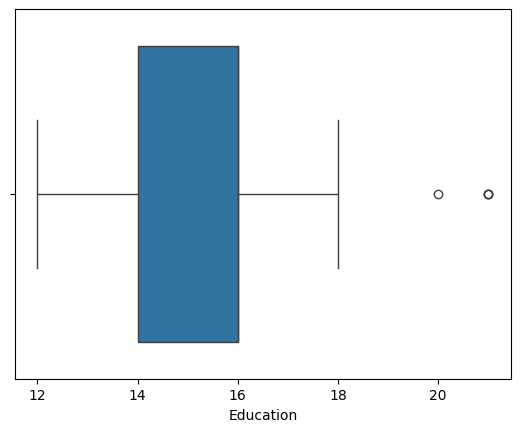

In [ ]:
sns.boxplot(df['Education'], orient='h')
plt.show()

In [ ]:
education_25= np.percentile(df['Education'], 25)
education_25

14.0

In [ ]:
education_50= np.percentile(df['Education'], 50)
education_50

16.0

In [ ]:
education_75= np.percentile(df['Education'], 75)
education_75

16.0

In [ ]:
iqr_education= education_75-education_25
iqr_education

2.0

In [ ]:
#now to calculate the buffer
upper_education_limit= education_75+1.5*iqr_education
upper_education_limit

19.0

This means that above 19 all the values will be outliers in case of education column.

In [ ]:
education_outliers=df[df['Education']>upper_education_limit]
education_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

<Axes: xlabel='Usage'>

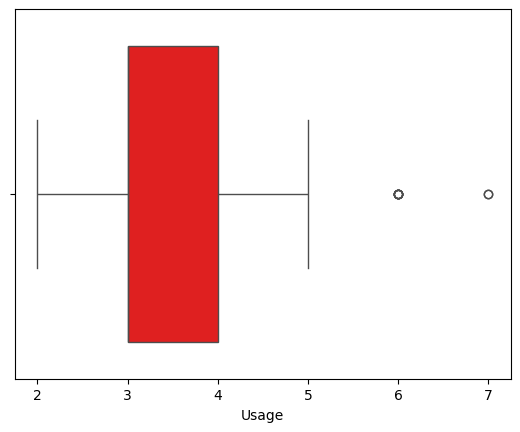

In [ ]:
sns.boxplot(df['Usage'], orient='h', color='r')

In [ ]:
usage_25 =np.percentile(df['Usage'], 25)
usage_25

3.0

In [ ]:
usage_50=np.percentile(df['Usage'], 50)
usage_50

3.0

In [ ]:
usage_75=np.percentile(df['Usage'],75)
usage_75

4.0

In [ ]:
iqr_usage=usage_75-usage_25
iqr_usage

1.0

In [ ]:
#now to calculate the buffer
upper_usage_limit= usage_75+1.5*iqr_usage
upper_usage_limit

5.5

anything above 5.5 will be considered as outlier in case of usage column.

In [ ]:
usage_outliers=df[df['Usage']>upper_usage_limit]
usage_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [ ]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<Axes: xlabel='Income'>

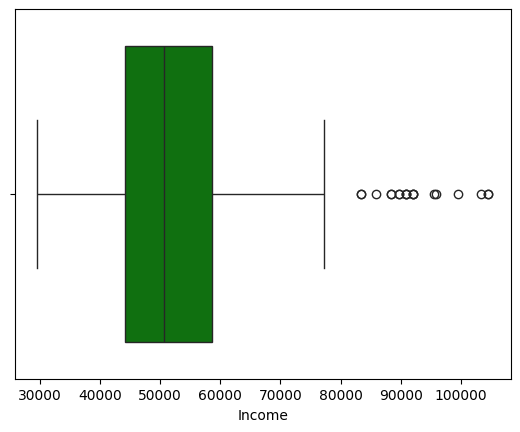

In [ ]:
sns.boxplot(df['Income'], orient='h', color='g')

In [ ]:
income_25=np.percentile(df['Income'],25)
income_25

44058.75

In [ ]:
income_50=np.percentile(df['Income'],50)
income_50

50596.5

In [ ]:
income_75=np.percentile(df['Income'],75)
income_75

58668.0

In [ ]:
iqr_income=income_75-income_25
iqr_income

14609.25

In [ ]:
#to calculte the buffer
upper_income_range=income_75+1.5*iqr_income
upper_income_range

80581.875

In [ ]:
income_outliers= df[df['Income']>upper_income_range]
income_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [ ]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<Axes: xlabel='Miles'>

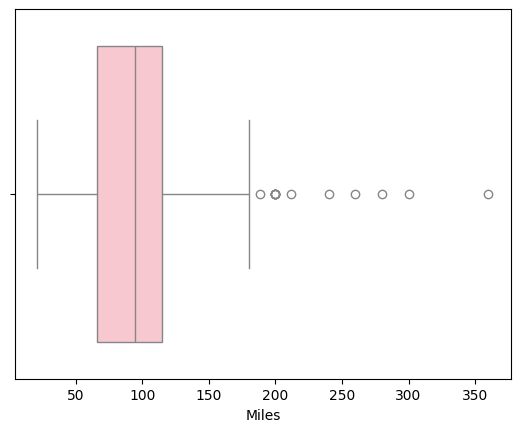

In [ ]:
sns.boxplot(df['Miles'], orient='h', color='pink')

In [ ]:
miles_25=np.percentile(df['Miles'],25)
miles_25

66.0

In [ ]:
miles_50=np.percentile(df['Miles'],50)
miles_50

94.0

In [ ]:
miles_75=np.percentile(df['Miles'],75)
miles_75

114.75

In [ ]:
iqr_miles= miles_75-miles_25
iqr_miles

48.75

In [ ]:
#to calculate the buffer
upper_miles_range= miles_75+1.5*iqr_miles
upper_miles_range

187.875

In [ ]:
miles_outliers= df[df['Miles']>upper_miles_range]
miles_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
age_array=df['Age'].values
age_array

array([18, 19, 19, 19, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25,
       26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29,
       29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 35, 36, 37,
       38, 38, 38, 38, 39, 40, 41, 43, 44, 46, 47, 50, 19, 20, 20, 20, 21,
       21, 21, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 29, 30, 30, 31, 31, 31, 32,
       32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 37, 38, 38, 40,
       40, 40, 45, 48, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25,
       25, 25, 25, 25, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 30, 30,
       31, 33, 34, 35, 38, 40, 42, 45, 47, 48])

In [ ]:
age_clip=np.clip(age_array, np.percentile(df['Age'],5), np.percentile(df['Age'],95))
age_clip

array([20.  , 20.  , 20.  , 20.  , 20.  , 20.  , 21.  , 21.  , 21.  ,
       21.  , 22.  , 22.  , 22.  , 22.  , 23.  , 23.  , 23.  , 23.  ,
       23.  , 23.  , 23.  , 23.  , 24.  , 24.  , 24.  , 24.  , 24.  ,
       25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 26.  , 26.  ,
       26.  , 26.  , 26.  , 26.  , 26.  , 27.  , 27.  , 27.  , 28.  ,
       28.  , 28.  , 28.  , 28.  , 28.  , 29.  , 29.  , 29.  , 30.  ,
       30.  , 31.  , 31.  , 32.  , 32.  , 33.  , 33.  , 34.  , 34.  ,
       35.  , 35.  , 35.  , 36.  , 37.  , 38.  , 38.  , 38.  , 38.  ,
       39.  , 40.  , 41.  , 43.  , 43.05, 43.05, 43.05, 43.05, 20.  ,
       20.  , 20.  , 20.  , 21.  , 21.  , 21.  , 23.  , 23.  , 23.  ,
       23.  , 23.  , 23.  , 23.  , 24.  , 24.  , 24.  , 25.  , 25.  ,
       25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  ,
       26.  , 26.  , 26.  , 27.  , 29.  , 30.  , 30.  , 31.  , 31.  ,
       31.  , 32.  , 32.  , 33.  , 33.  , 33.  , 33.  , 33.  , 34.  ,
       34.  , 34.  ,

In [ ]:
education_array=df['Education'].values
education_array

array([14, 15, 14, 12, 13, 14, 14, 13, 15, 15, 14, 14, 16, 14, 16, 16, 14,
       16, 16, 15, 14, 16, 16, 16, 14, 13, 16, 14, 14, 14, 14, 16, 16, 16,
       14, 16, 16, 16, 16, 16, 16, 14, 16, 14, 14, 16, 14, 14, 14, 16, 18,
       14, 16, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 18, 12, 16,
       16, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14,
       16, 12, 14, 14, 16, 16, 16, 14, 16, 14, 14, 16, 14, 14, 16, 14, 14,
       14, 14, 14, 16, 14, 14, 16, 16, 16, 14, 14, 14, 13, 16, 16, 18, 16,
       16, 13, 16, 16, 16, 18, 16, 16, 15, 14, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 14, 16, 18, 16, 18, 16, 16, 18, 16, 16, 16, 16, 18,
       18, 18, 18, 20, 21, 16, 16, 18, 21, 18, 18, 18, 18, 14, 16, 18, 18,
       16, 18, 16, 16, 18, 21, 18, 16, 18, 18])

In [ ]:
education_clip=np.clip(education_array, np.percentile(df['Education'],5), np.percentile(df['Education'],95))
education_clip

array([14., 15., 14., 14., 14., 14., 14., 14., 15., 15., 14., 14., 16.,
       14., 16., 16., 14., 16., 16., 15., 14., 16., 16., 16., 14., 14.,
       16., 14., 14., 14., 14., 16., 16., 16., 14., 16., 16., 16., 16.,
       16., 16., 14., 16., 14., 14., 16., 14., 14., 14., 16., 18., 14.,
       16., 14., 14., 14., 14., 14., 14., 16., 16., 16., 16., 16., 16.,
       18., 14., 16., 16., 14., 14., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 14., 14., 14., 14., 14., 16., 14., 14., 14., 16., 16.,
       16., 14., 16., 14., 14., 16., 14., 14., 16., 14., 14., 14., 14.,
       14., 16., 14., 14., 16., 16., 16., 14., 14., 14., 14., 16., 16.,
       18., 16., 16., 14., 16., 16., 16., 18., 16., 16., 15., 14., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 14., 16., 18.,
       16., 18., 16., 16., 18., 16., 16., 16., 16., 18., 18., 18., 18.,
       18., 18., 16., 16., 18., 18., 18., 18., 18., 18., 14., 16., 18.,
       18., 16., 18., 16., 16., 18., 18., 18., 16., 18., 18.])

In [ ]:
usage_array=df['Usage'].values
usage_array

array([3, 2, 4, 3, 4, 3, 3, 3, 5, 2, 3, 3, 4, 3, 3, 3, 2, 4, 4, 2, 4, 4,
       4, 5, 2, 3, 4, 3, 2, 2, 3, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 2,
       2, 2, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 2, 3, 4, 2, 3, 4, 2, 4, 3, 3,
       4, 3, 3, 2, 2, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 5, 2, 2, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 5, 3, 2, 4, 3, 2, 2, 4, 4, 4,
       4, 4, 3, 3, 4, 3, 2, 2, 4, 3, 4, 2, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 4, 3, 3, 3, 3, 2, 2, 4, 3, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4,
       6, 6, 4, 4, 5, 4, 4, 4, 6, 7, 6, 5, 7, 6, 5, 5, 6, 4, 5, 4, 5, 6,
       5, 5, 4, 4])

In [ ]:
usage_clip=np.clip(usage_array, np.percentile(df['Usage'],5), np.percentile(df['Usage'],95))
usage_clip

array([3.  , 2.  , 4.  , 3.  , 4.  , 3.  , 3.  , 3.  , 5.  , 2.  , 3.  ,
       3.  , 4.  , 3.  , 3.  , 3.  , 2.  , 4.  , 4.  , 2.  , 4.  , 4.  ,
       4.  , 5.  , 2.  , 3.  , 4.  , 3.  , 2.  , 2.  , 3.  , 3.  , 2.  ,
       3.  , 3.  , 4.  , 2.  , 3.  , 3.  , 4.  , 3.  , 3.  , 4.  , 2.  ,
       2.  , 2.  , 3.  , 3.  , 4.  , 3.  , 3.  , 2.  , 4.  , 4.  , 3.  ,
       2.  , 2.  , 3.  , 4.  , 2.  , 3.  , 4.  , 2.  , 4.  , 3.  , 3.  ,
       4.  , 3.  , 3.  , 2.  , 2.  , 3.  , 4.  , 3.  , 4.  , 3.  , 3.  ,
       3.  , 4.  , 3.  , 3.  , 2.  , 3.  , 3.  , 5.  , 2.  , 2.  , 3.  ,
       3.  , 3.  , 4.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 2.  , 3.  ,
       2.  , 5.  , 3.  , 2.  , 4.  , 3.  , 2.  , 2.  , 4.  , 4.  , 4.  ,
       4.  , 4.  , 3.  , 3.  , 4.  , 3.  , 2.  , 2.  , 4.  , 3.  , 4.  ,
       2.  , 3.  , 5.  , 3.  , 4.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  ,
       2.  , 4.  , 3.  , 3.  , 3.  , 3.  , 2.  , 2.  , 4.  , 3.  , 4.  ,
       4.  , 5.  , 4.  , 4.  , 4.  , 5.  , 5.  , 4.

In [ ]:
income_array=df['Income'].values
income_array

array([ 29562,  31836,  30699,  32973,  35247,  32973,  35247,  32973,
        35247,  37521,  36384,  35247,  36384,  35247,  38658,  40932,
        34110,  39795,  38658,  34110,  38658,  40932,  42069,  44343,
        45480,  42069,  46617,  48891,  45480,  53439,  39795,  40932,
        40932,  43206,  44343,  52302,  53439,  51165,  36384,  44343,
        50028,  45480,  54576,  45480,  46617,  52302,  52302,  54576,
        54576,  51165,  68220,  46617,  50028,  46617,  54576,  54576,
        45480,  46617,  52302,  55713,  46617,  51165,  52302,  48891,
        60261,  67083,  44343,  37521,  46617,  54576,  52302,  56850,
        59124,  61398,  54576,  53439,  57987,  60261,  56850,  64809,
        31836,  32973,  34110,  38658,  34110,  34110,  32973,  36384,
        38658,  45480,  45480,  43206,  40932,  45480,  40932,  48891,
        50028,  45480,  43206,  52302,  47754,  45480,  43206,  45480,
        43206,  50028,  45480,  48891,  45480,  50028,  51165,  45480,
      

In [ ]:
income_clip=np.clip(income_array, np.percentile(df['Income'],5), np.percentile(df['Income'],95))
income_clip

array([34053.15, 34053.15, 34053.15, 34053.15, 35247.  , 34053.15,
       35247.  , 34053.15, 35247.  , 37521.  , 36384.  , 35247.  ,
       36384.  , 35247.  , 38658.  , 40932.  , 34110.  , 39795.  ,
       38658.  , 34110.  , 38658.  , 40932.  , 42069.  , 44343.  ,
       45480.  , 42069.  , 46617.  , 48891.  , 45480.  , 53439.  ,
       39795.  , 40932.  , 40932.  , 43206.  , 44343.  , 52302.  ,
       53439.  , 51165.  , 36384.  , 44343.  , 50028.  , 45480.  ,
       54576.  , 45480.  , 46617.  , 52302.  , 52302.  , 54576.  ,
       54576.  , 51165.  , 68220.  , 46617.  , 50028.  , 46617.  ,
       54576.  , 54576.  , 45480.  , 46617.  , 52302.  , 55713.  ,
       46617.  , 51165.  , 52302.  , 48891.  , 60261.  , 67083.  ,
       44343.  , 37521.  , 46617.  , 54576.  , 52302.  , 56850.  ,
       59124.  , 61398.  , 54576.  , 53439.  , 57987.  , 60261.  ,
       56850.  , 64809.  , 34053.15, 34053.15, 34110.  , 38658.  ,
       34110.  , 34110.  , 34053.15, 36384.  , 38658.  , 45480

In [ ]:
miles_array=df['Miles'].values
miles_array

array([112,  75,  66,  85,  47,  66,  75,  85, 141,  85,  85,  66,  75,
        75,  47,  75, 103,  94, 113,  38, 113,  94,  94, 188, 113,  47,
        75,  75,  56,  47,  85, 113,  47,  85, 113, 113,  47,  85,  66,
       132,  85,  66,  85,  56,  56,  66, 103,  94, 113,  56,  85,  38,
        94, 141,  85,  47,  47, 113,  85,  38,  85, 169,  66,  85,  94,
        85,  94,  85,  75,  56,  56,  75, 132,  66, 103,  66,  75,  47,
        94,  66,  64,  53, 106,  95, 212,  42,  53,  95,  85,  95, 127,
        74,  53,  64,  85, 106, 106,  85, 127,  42, 106,  95,  64, 170,
       106,  53,  42, 127,  85, 127, 106,  53,  95,  74, 106,  95,  64,
        21, 127,  95, 170,  85,  95,  95,  74,  95,  85,  85,  53,  53,
        64,  95,  85,  85, 106,  85,  85,  95,  42,  64, 106, 120, 200,
       140, 100, 100, 100,  80, 200, 160, 120, 160, 200, 100, 180, 240,
       170, 100, 180, 160, 100, 100, 180, 180, 150, 180, 300, 280, 160,
       150, 260, 200, 150, 360, 150, 200, 200, 160, 120, 180])

In [ ]:
miles_clip=np.clip(miles_array, np.percentile(df['Miles'],5), np.percentile(df['Miles'],95))
miles_clip

array([112.,  75.,  66.,  85.,  47.,  66.,  75.,  85., 141.,  85.,  85.,
        66.,  75.,  75.,  47.,  75., 103.,  94., 113.,  47., 113.,  94.,
        94., 188., 113.,  47.,  75.,  75.,  56.,  47.,  85., 113.,  47.,
        85., 113., 113.,  47.,  85.,  66., 132.,  85.,  66.,  85.,  56.,
        56.,  66., 103.,  94., 113.,  56.,  85.,  47.,  94., 141.,  85.,
        47.,  47., 113.,  85.,  47.,  85., 169.,  66.,  85.,  94.,  85.,
        94.,  85.,  75.,  56.,  56.,  75., 132.,  66., 103.,  66.,  75.,
        47.,  94.,  66.,  64.,  53., 106.,  95., 200.,  47.,  53.,  95.,
        85.,  95., 127.,  74.,  53.,  64.,  85., 106., 106.,  85., 127.,
        47., 106.,  95.,  64., 170., 106.,  53.,  47., 127.,  85., 127.,
       106.,  53.,  95.,  74., 106.,  95.,  64.,  47., 127.,  95., 170.,
        85.,  95.,  95.,  74.,  95.,  85.,  85.,  53.,  53.,  64.,  95.,
        85.,  85., 106.,  85.,  85.,  95.,  47.,  64., 106., 120., 200.,
       140., 100., 100., 100.,  80., 200., 160., 12

In [ ]:
fitness_array=df['Fitness'].values
fitness_clip=np.clip(fitness_array, np.percentile(df['Fitness'],5), np.percentile(df['Fitness'],95))
fitness_clip

array([4., 3., 3., 3., 2., 3., 3., 3., 4., 3., 3., 2., 3., 3., 2., 3., 3.,
       3., 3., 2., 3., 3., 3., 5., 3., 2., 3., 3., 3., 2., 3., 4., 2., 3.,
       4., 3., 2., 3., 3., 4., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 3., 4., 3., 2., 2., 4., 3., 2., 3., 5., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 4., 3., 3., 3., 4., 2., 3., 3., 3., 3., 3., 3., 4.,
       2., 2., 3., 3., 3., 3., 2., 2., 3., 2., 4., 3., 3., 4., 2., 3., 3.,
       3., 3., 4., 3., 2., 3., 3., 4., 3., 2., 3., 3., 3., 3., 3., 2., 3.,
       3., 4., 3., 3., 3., 4., 3., 4., 3., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 2., 3., 3., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 4., 5.,
       3., 4., 5., 5., 3., 4., 5., 3., 4., 5., 5., 5., 5., 5., 5., 4., 5.,
       5., 5., 5., 5., 5., 5., 4., 5., 5., 5.])

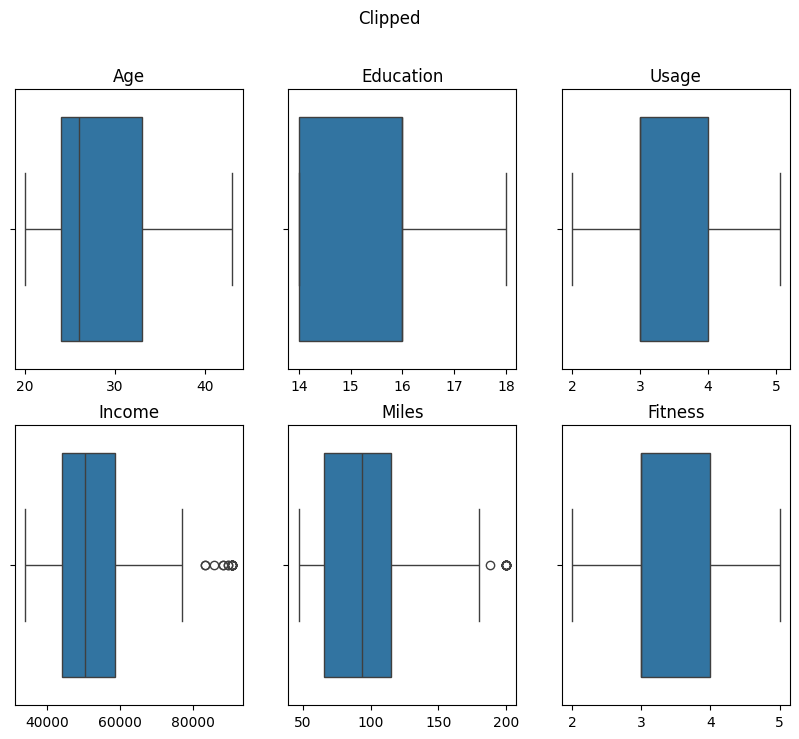

In [ ]:
fig,ax= plt.subplots(2,3, figsize=(10,8))
fig.suptitle('Clipped Data')

plt.subplot(2,3,1)
sns.boxplot(data=df, x=age_clip)
plt.title('Age')

plt.subplot(2,3,2)
sns.boxplot(data=df, x=education_clip)
plt.title('Education')

plt.subplot(2,3,3)
sns.boxplot(data=df, x=usage_clip)
plt.title('Usage')

plt.subplot(2,3,4)
sns.boxplot(data=df, x=income_clip)
plt.title('Income')

plt.subplot(2,3,5)
sns.boxplot(data=df, x=miles_clip)
plt.title('Miles')

plt.subplot(2,3,6)
sns.boxplot(data=df, x=fitness_clip)
plt.title('Fitness')
plt.show()

**Check if features like marital status, Gender, and age have any effect on the product purchased.**

In [ ]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

'KP281' entry level treadmill is is maximum sold product among 3.

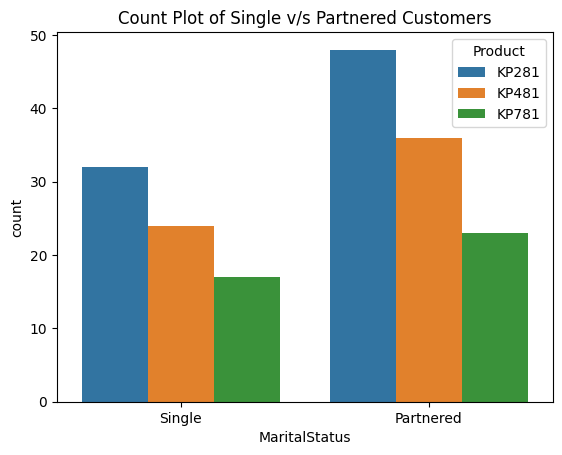

In [ ]:
sns.countplot(x=df['MaritalStatus'], hue=df['Product'])
plt.title('Count Plot of Single v/s Partnered Customers')
plt.show()

**Insights:**
* Partnered People have purchased more treadmills than single people.


**Recommendation:**
* As we can see that partnered people have purchased more than single people because a single product can be used by 2 people so it can be economical to the couple. The we can offer a discount on the product for partnered people to attract more customers.

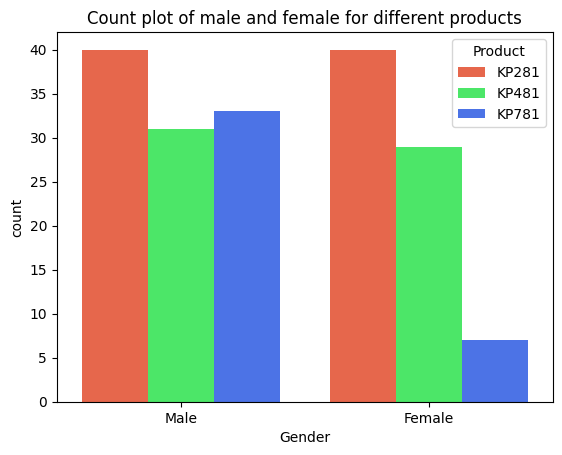

In [ ]:
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]
sns.countplot(x=df['Gender'], hue=df['Product'], palette=custom_palette)
plt.title('Count plot of male and female for different products')
plt.show()

**Insights:**
* For product KP781(advanced level), significantly count of males is lot higher than females.

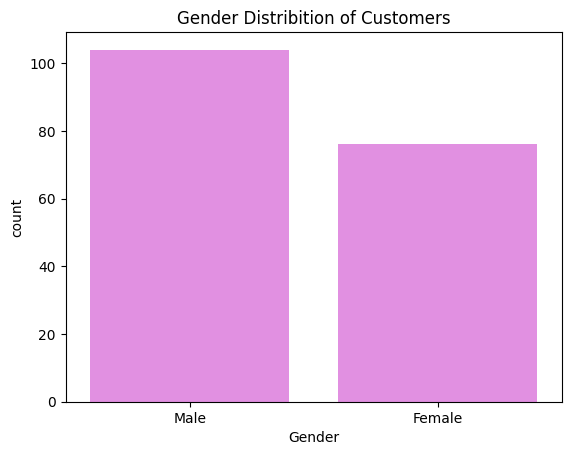

In [ ]:
sns.countplot(data=df, x='Gender', color='violet')
plt.title('Gender Distribition of Customers')
plt.show()

**Insights:**
* Males are buying treadmills more than females.

**Recommendations:**
* Overall females are buying less treadmill than males. So we can focus more on female customers to boost the sales maybe be doing promotion with a female health influencers.

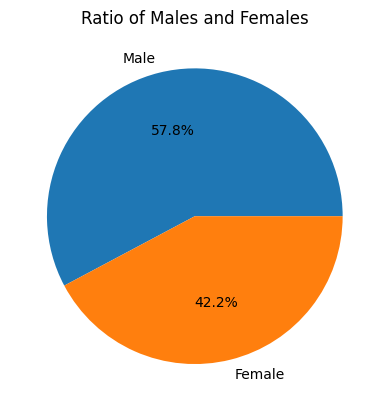

In [ ]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Ratio of Males and Females')
plt.show()

**Insights:**
* This shows the pie chart distribution of gender column.
* Overall 57.8 % customers are males and 42.2% customers are females.

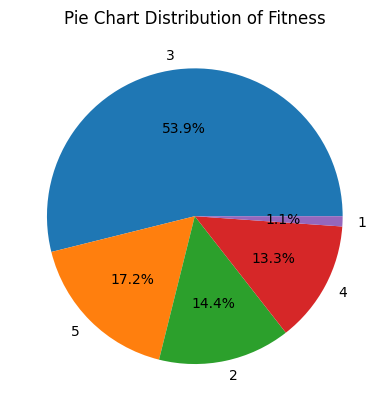

In [ ]:
plt.pie(df['Fitness'].value_counts(), labels= df['Fitness'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart Distribution of Fitness')
plt.show()

**Insights:**
* Approximately more than 50% customers, have rated their fitness level 3.
* They should be encouraged more to achieve higher fitness score by using the Aerofit Treadmill products.

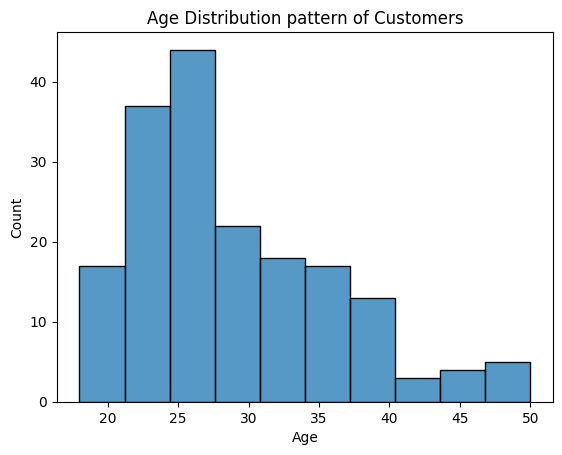

In [ ]:
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution pattern of Customers')
plt.show()

**Insights:**
* Maximum people who are in age range 25 have bought the product.
* We can see here that as age is increasing(especially after 40 years), demand for the product is decreasing.
* So we can launch a new category in treadmill product for old age people so that they can also focus on their health.

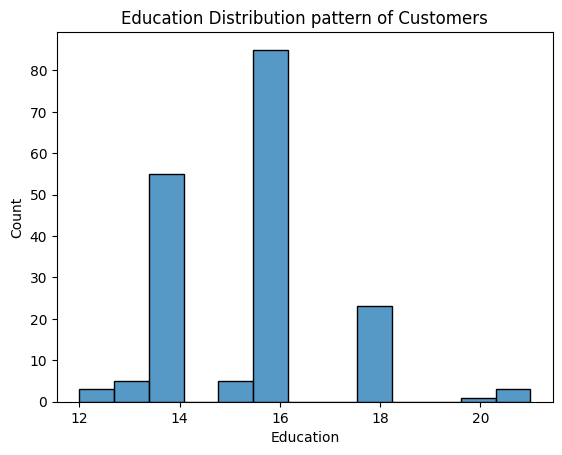

In [ ]:
sns.histplot(data=df, x='Education')
plt.title('Education Distribution pattern of Customers')
plt.show()

**Insights:**
* Cutomers who have 16 years of education have bought the highest products.

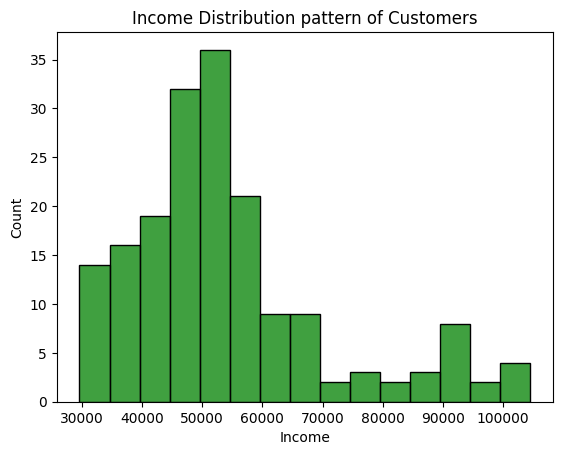

In [ ]:
sns.histplot(data=df, x='Income', color='g')
plt.title('Income Distribution pattern of Customers')
plt.show()

Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

In [ ]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
#P(KP281)
P_KP281= 80/180
np.round(P_KP281,2)


0.44

* 44% have bought KP281 product.




In [ ]:
#P(KP481)
P_KP481= 60/180
np.round(P_KP481,2)

0.33

* 33% have bought KP481 product.

In [ ]:
#P(KP781)
P_KP781= 40/180
np.round(P_KP781,2)

0.22

* 22% have bought KP781 product.

In [ ]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
#Probability of female Customers:-
P_female= (76/180)
np.round(P_female,2)

0.42

* 42% are female customers.

In [ ]:
#Probability of male Customers:-
P_male= (104/180)
np.round(P_male,2)

0.58

* 58% are male customers.

**Find the probability that the customer buys a product based on each column.**

In [ ]:
pd.crosstab(df['Product'], df['Usage'], margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


In [ ]:
P_2_kp281= 19/33
np.round(P_2_kp281,2)

0.58

In [ ]:
P_2_kp481= 14/33
np.round(P_2_kp481,2)

0.42

In [ ]:
P_3_kp281= 37/69
np.round(P_3_kp281,2)

0.54

In [ ]:
P_3_kp481= 31/69
np.round(P_3_kp481,2)

0.45

In [ ]:
P_4_kp281= 22/52
np.round(P_4_kp281,2)

0.42

In [ ]:
P_4_kp481= 18/52
np.round(P_4_kp281,2)

0.42

In [ ]:
P_5_kp281= 2/17
np.round(P_5_kp281,2)

0.12

In [ ]:
P_5_kp481= 3/17
np.round(P_5_kp481,2)

0.18

In [ ]:
P_5_kp781= 12/17
np.round(P_5_kp781,2)

0.71

**Find the conditional probability that an event occurs given that another event has occurred.**

In [ ]:
pd.crosstab(df['Product'],df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
#P(she will buy KP281|Female)
P_F_KP281=(40/76)
np.round(P_F_KP281,2)

0.53

In [ ]:
#P(He will buy KP281|Male)
P_M_KP281=(40/104)
np.round(P_M_KP281,2)

0.38

In [ ]:
#P(she will buy KP481|Female)
P_F_KP481=(29/76)
np.round(P_F_KP481,2)

0.38

In [ ]:
#P(he will buy KP481|male)
P_M_KP481=(31/104)
np.round(P_M_KP481,2)

0.3

In [ ]:
#P(she will buy KP781|Female)
P_F_KP781=(7/76)
np.round(P_F_KP781,2)

0.09

In [ ]:
#P(he will buy KP781|male)
P_M_KP781=(33/104)
np.round(P_M_KP781,2)

0.32

In [ ]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
#P(will buy KP281|Partnered)
P_P_KP281=(48/107)
np.round(P_P_KP281,2)

0.45

* Given that partnered, 45% customers will buy KP281.

In [ ]:
#P(will buy KP281|Single)
P_S_KP281=(32/73)
np.round(P_S_KP281,2)

0.44

* Given that single, 44% customers will buy KP281.

In [ ]:
#P(will buy KP481|Partnered)
P_P_KP481=(36/107)
np.round(P_P_KP481,2)

0.34

* Given that partnered, 34% customers will buy KP481.

In [ ]:
#P(will buy KP481|Single)
P_S_KP481=(24/73)
np.round(P_S_KP481,2)

0.33

* Given that single, 33% customers will buy KP481.

In [ ]:
#P(will buy KP781|Partnered)
P_P_KP781=(23/107)
np.round(P_P_KP781,2)

0.21

* Given that partnered, 21% customers will buy KP781.

In [ ]:
#P(will buy KP781|Single)
P_S_KP781=(17/73)
np.round(P_S_KP781,2)

0.23

* Given that single, 23% customers will buy KP781.

**Check the correlation among different factors**


In [ ]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [ ]:
num=df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

In [ ]:
num.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

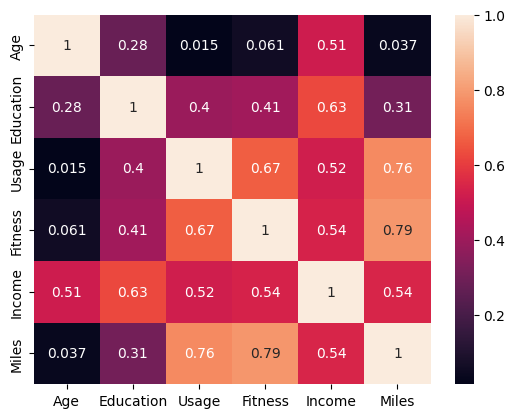

In [ ]:
sns.heatmap(num.corr(), annot=True)

**Insights:**
* Fitness and Miles are positively correlated. It means if miles are increasing, fitness is also increasing.
* Usage and miles are positivel correlated. If a customer plans to use more number of times the treadmill, the miles will also increase.
* Income and education are positively correlated towards 1, which means if a customer has higher education, his income will be more.

**Customer profiling and recommendation**

**Make customer profilings for each and every product.**

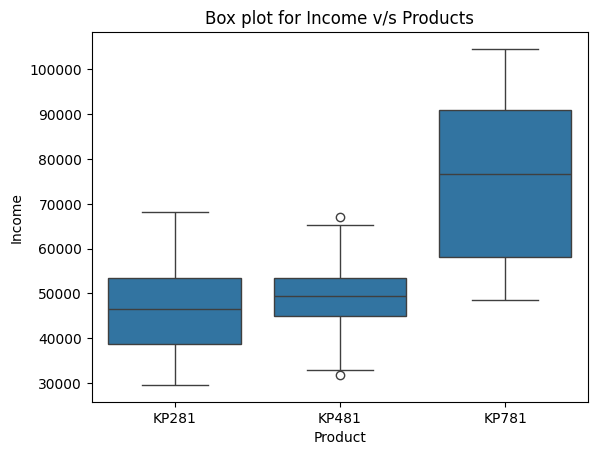

In [ ]:
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Box plot for Income v/s Products')
plt.show()

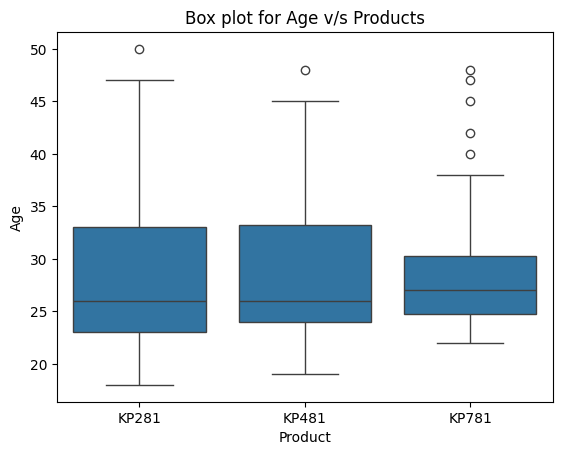

In [ ]:
sns.boxplot(data=df, y='Age',x='Product')
plt.title('Box plot for Age v/s Products')
plt.show()

In [ ]:
avg_education_level=df.groupby('Product')['Education'].mean().reset_index()
avg_education_level

,Product,Education
0,KP281,15.037500
1,KP481,15.116667
2,KP781,17.325000


<ipython-input-42-89ac12702083>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_education_level, x='Product', y='Education', palette ='hls')


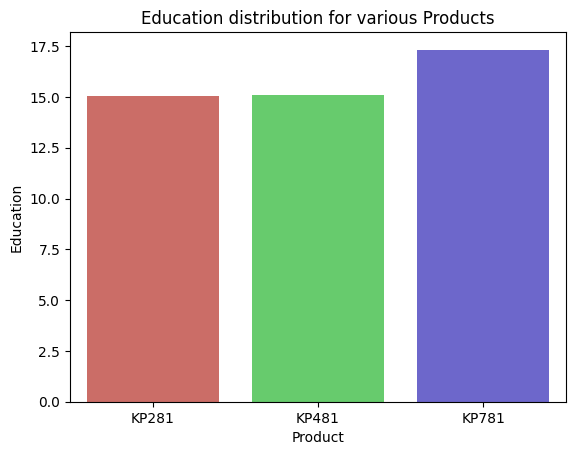

In [ ]:
sns.barplot(data=avg_education_level, x='Product', y='Education', palette ='hls')
plt.title('Education distribution for various Products')
plt.show()

**Insights:**
* More educated poeple are buying the advanced level product i.e. 'KP781'. From this we can infer that, the people who are more educated, are more aware of fitness and thus buying the advanced level product.

**Recommendations:**
* Maybe we can education campaign on fitness to make people more aware regarding fitness.

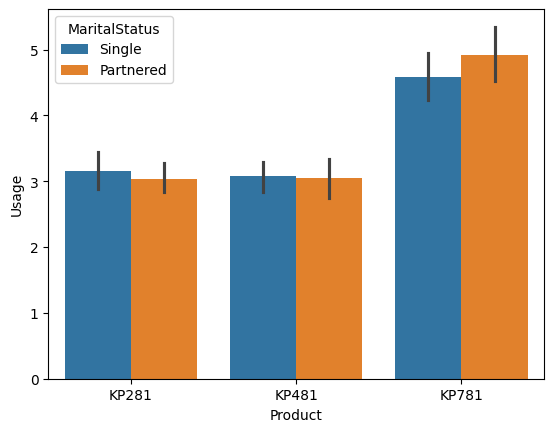

In [ ]:
sns.barplot(data=df, x=df['Product'], y=df['Usage'], hue=df['MaritalStatus'])
plt.show()

* Partnered people have purchased more than single customers for KP781 product.

In [ ]:
avg_miles= df.groupby('Product')['Miles'].mean().reset_index()
avg_miles

,Product,Miles
0,KP281,82.787500
1,KP481,87.933333
2,KP781,166.900000


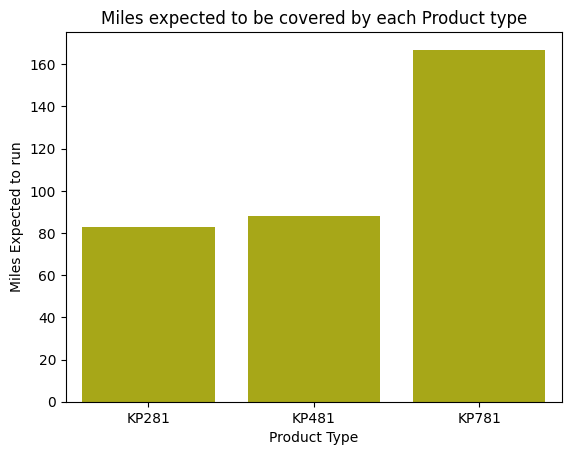

In [ ]:
sns.barplot(x='Product', y='Miles', data=avg_miles, color='y')
plt.xlabel('Product Type')
plt.ylabel('Miles Expected to run')
plt.title('Miles expected to be covered by each Product type')
plt.show()

**Insights:**
* Customers who are buying the KP781 product are expected to walk/run the most on this treadmill.

In [ ]:
avg_usage= df.groupby('Product')['Usage'].mean().reset_index()
avg_usage

,Product,Usage
0,KP281,3.087500
1,KP481,3.066667
2,KP781,4.775000


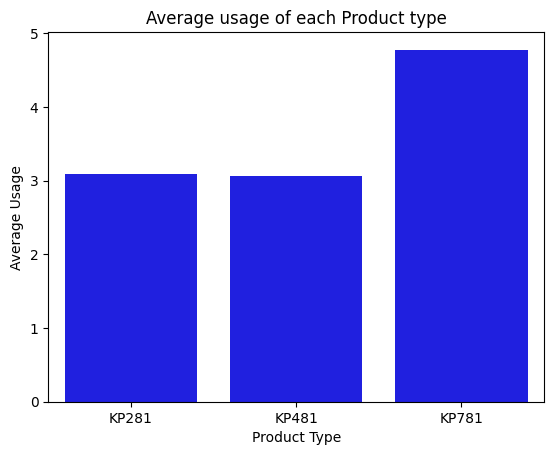

In [ ]:
sns.barplot(x='Product', y='Usage', data=avg_usage, color='b')
plt.xlabel('Product Type')
plt.ylabel('Average Usage')
plt.title('Average usage of each Product type')
plt.show()

**Insights:**
* Here, we can see that KP781 product has the highest usage while KP281 and KP481 has similar usage.

**Recommendations:**

**KP281**
* Customers whose income ranges between 30 thousand dollars to less than 70 thousand dollars approximately are buying this product.
* Median age is 25 approx.
* The education level is same for KP281 and KP481 product types.
* The ratio of single and partnered is almost same for KP281 and KP481 product types.

**KP481**
* Customers whose income ranges more than 30 thousand dollars to less than 70 thousand dollars approximately are buying this product.
* Median age is 25 approx.
* The education level is same for KP281 and KP481 product types.
* The ratio of single and partnered is almost same for KP281 and KP481 product types.
* Customers expect to run/walk a slightly higher number of miles than KP281.

**KP781**
* Customers whose income ranges more than 50 thousand dollars to more than 1Lakh dollars approximately are buying this product.
* Here median age is higher in comparison to other 2 products.In age we have lot of outliers also for this product type.
* More educated people are buying this product.
* Partnered customers have purchased more this product.
* Customers expect to run/walk greater number of miles on this product type.
* Avg usage of this product type is higher.
